In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir(module_path)
os.getcwd()

'/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta'

# activating package

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook

In [3]:
from mlop_beta.dataset_calling import load_data
from mlop_beta.data_explorer import discovery
from mlop_beta.feature_engineer import ft_engineer
from mlop_beta.classification import model_list, models_comparer
from mlop_beta.classification import create_model, tune_model
from mlop_beta.classification import classification_eval

# data load

In [4]:
dt = load_data()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [15]:
dt = dt[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default']]
dt

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default
0,20000,2,2,1,24,1
1,90000,2,2,2,34,0
2,50000,2,2,1,37,0
3,50000,1,2,1,57,0
4,50000,1,1,2,37,0
...,...,...,...,...,...,...
23995,80000,1,2,2,34,1
23996,150000,1,3,2,43,0
23997,30000,1,2,2,37,1
23998,80000,1,3,1,41,1


# EDA

In [27]:
discovery(data=dt, feature=dt.columns, label='default')

'EDA WITH TALE IS DONE'

# feature engineering

In [40]:
x_train, x_test, y_train, y_test = ft_engineer(data=dt, label='default',
                                               cat_var=[], features_to_drop=[],
                                               transform=False)


no numerical variables
X train: (16800, 5)
y train: (16800,)
X test: (7200, 5)
y test: (7200,)


# model development

## spot check

Logistic: 0.618631 (0.015220)
RidgeClassifier: 0.617917 (0.015242)
LDA: 0.617926 (0.015243)
QDA: 0.612190 (0.014242)
SGDC: 0.590782 (0.027132)
time: 0.024073 mins


<IPython.core.display.Javascript object>


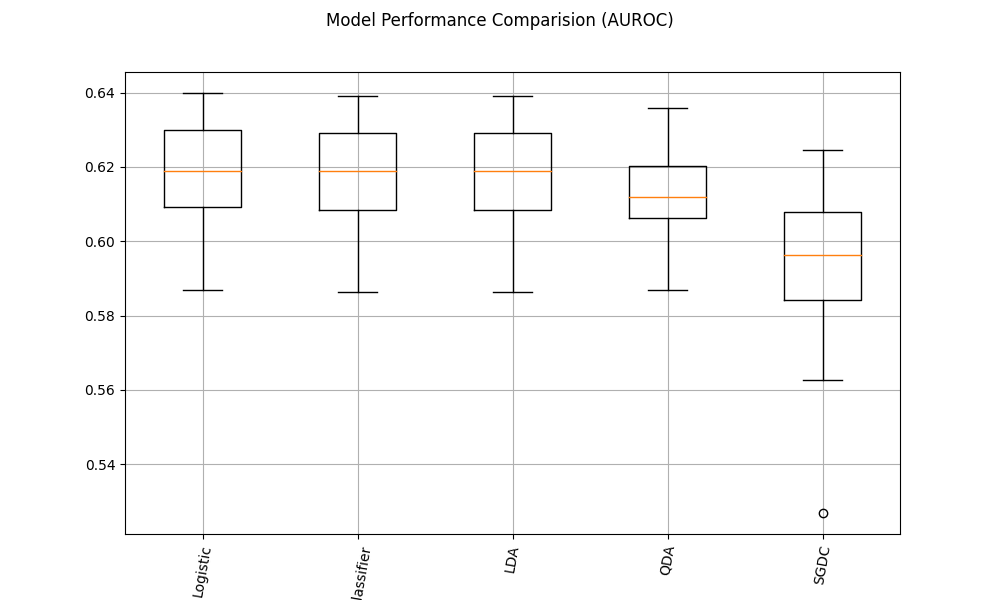

In [17]:
mod_list = model_list()
res, nam_model = models_comparer(list_of_model=mod_list, x=x_train, y=y_train)

pip install jupyter_contrib_nbextensions

jupyter contrib nbextension install --user


pip install jupyter_nbextensions_configurator


jupyter nbextensions_configurator enable --user

## selecting model

In [41]:
selected_mod = create_model(model_name='LogisticRegression', x=x_train, y=y_train)

,AUC
0,0.608740
1,0.605532
2,0.621359
3,0.639213
4,0.594490
5,0.613345
6,0.605086
7,0.601969
8,0.615315
9,0.587844


In [8]:
selected_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## model tuning

In [42]:
tuned_lr = tune_model(model_name='LogisticRegression',
                      x_feat=x_train, y_target=y_train,
                      num_trial=5)

[I 2022-07-06 23:24:24,589] A new study created in memory with name: no-name-b3ca69e4-5018-4b47-9ef6-88003bc03f30
[I 2022-07-06 23:24:29,028] Trial 0 finished with value: 0.6145276939080722 and parameters: {'penalty': 'l1', 'C': 89.92197157664532}. Best is trial 0 with value: 0.6145276939080722.
[I 2022-07-06 23:24:33,494] Trial 1 finished with value: 0.6145276939080722 and parameters: {'penalty': 'l1', 'C': 90.76246904862874}. Best is trial 0 with value: 0.6145276939080722.
[I 2022-07-06 23:24:34,084] Trial 2 finished with value: 0.6092892637705619 and parameters: {'penalty': 'l2', 'C': 18.936712795272886}. Best is trial 2 with value: 0.6092892637705619.
[I 2022-07-06 23:24:39,269] Trial 3 finished with value: 0.6145276939080722 and parameters: {'penalty': 'l1', 'C': 86.84770578178178}. Best is trial 2 with value: 0.6092892637705619.
[I 2022-07-06 23:24:44,911] Trial 4 finished with value: 0.6145276939080722 and parameters: {'penalty': 'l1', 'C': 53.04955126973551}. Best is trial 2 wi

The configuration of tuned model:
LogisticRegression(C=18.936712795272886, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [10]:
tuned_lr

LogisticRegression(C=8.376879021929948, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
x_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
3111,0.171717,1.0,0.166667,0.666667,0.051724
18679,0.171717,1.0,0.333333,0.333333,0.189655
17472,0.050505,1.0,0.333333,0.666667,0.034483
21451,0.151515,0.0,0.333333,0.333333,0.189655
20800,0.646465,1.0,0.166667,0.666667,0.137931


In [38]:
prob = tuned_lr.predict_proba(x_test)[:,1]
prob

array([0.18392163, 0.20739525, 0.23987323, ..., 0.18606707, 0.26063285,
       0.2164233 ])

# model inference

<IPython.core.display.Javascript object>


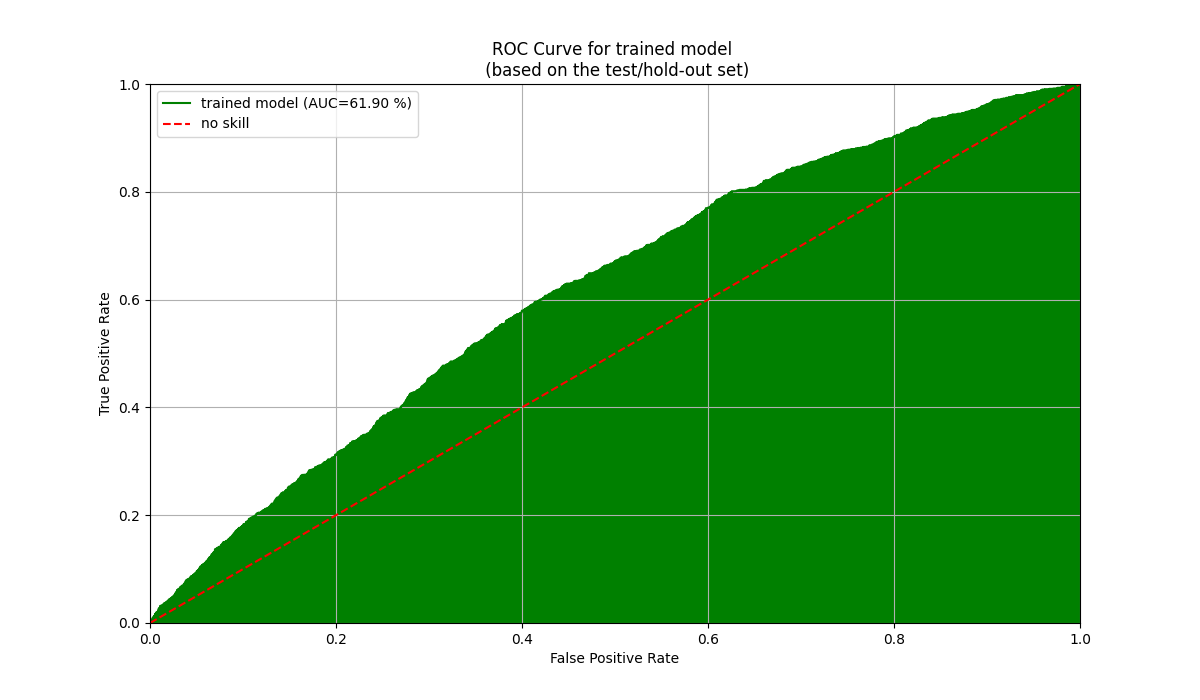

<IPython.core.display.Javascript object>


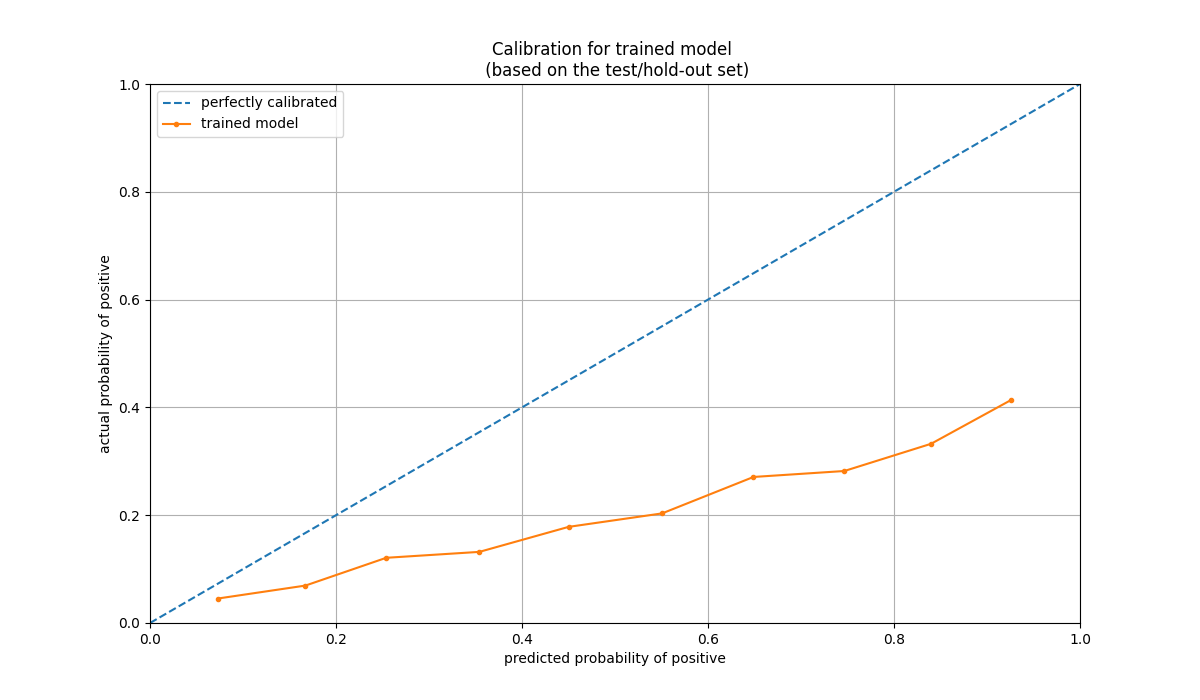

(0.6189723461349615,
 array([0.04545455, 0.06944444, 0.12096774, 0.13194444, 0.1783601 ,
        0.20333839, 0.27094595, 0.28198433, 0.33246753, 0.4137931 ]),
 array([0.0731889 , 0.16714627, 0.25400192, 0.35410675, 0.45013336,
        0.55063198, 0.64892376, 0.74657526, 0.83983389, 0.92596855]))

In [20]:
classification_eval(xtest=x_test, ytest=y_test,trainedModel=tuned_lr)

# deployment

In [ ]:
os.getcwd()

In [13]:
os.chdir('/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta')
os.getcwd()

'/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta'

In [43]:
import pickle
filename='model.pkl'
pickle.dump(tuned_lr, open(filename, 'wb'))

In [47]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.144.243:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
2022-07-06 23:27:28.166 Traceback (most recent call last):
  File "/Users/phuong/anaconda3/lib/python3.6/site-packages/streamlit/script_runner.py", line 354, in _run_script
    exec(code, module.__dict__)
  File "/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta/app.py", line 60, in <module>
    main()
  File "/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta/app.py", line 56, in main
    st.success('The output is %.4f'%(result))
TypeError: must be real number, not str

2022-07-06 23:27:33.945 Traceback (most recent call last):
  File "/Users/phuong/anaconda3/lib/python3.6/site-packages/streamlit/script_runner.py", line 354, in _run_script
    exec(code, module.__dict__)
  File "/Users/phuong